In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
print(df.isnull().sum()/len(df))

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [7]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [8]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [9]:
cat_features=df.select_dtypes(include=['object']).columns.tolist()

In [10]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [11]:
corr=df[num_features].corr()

<Axes: >

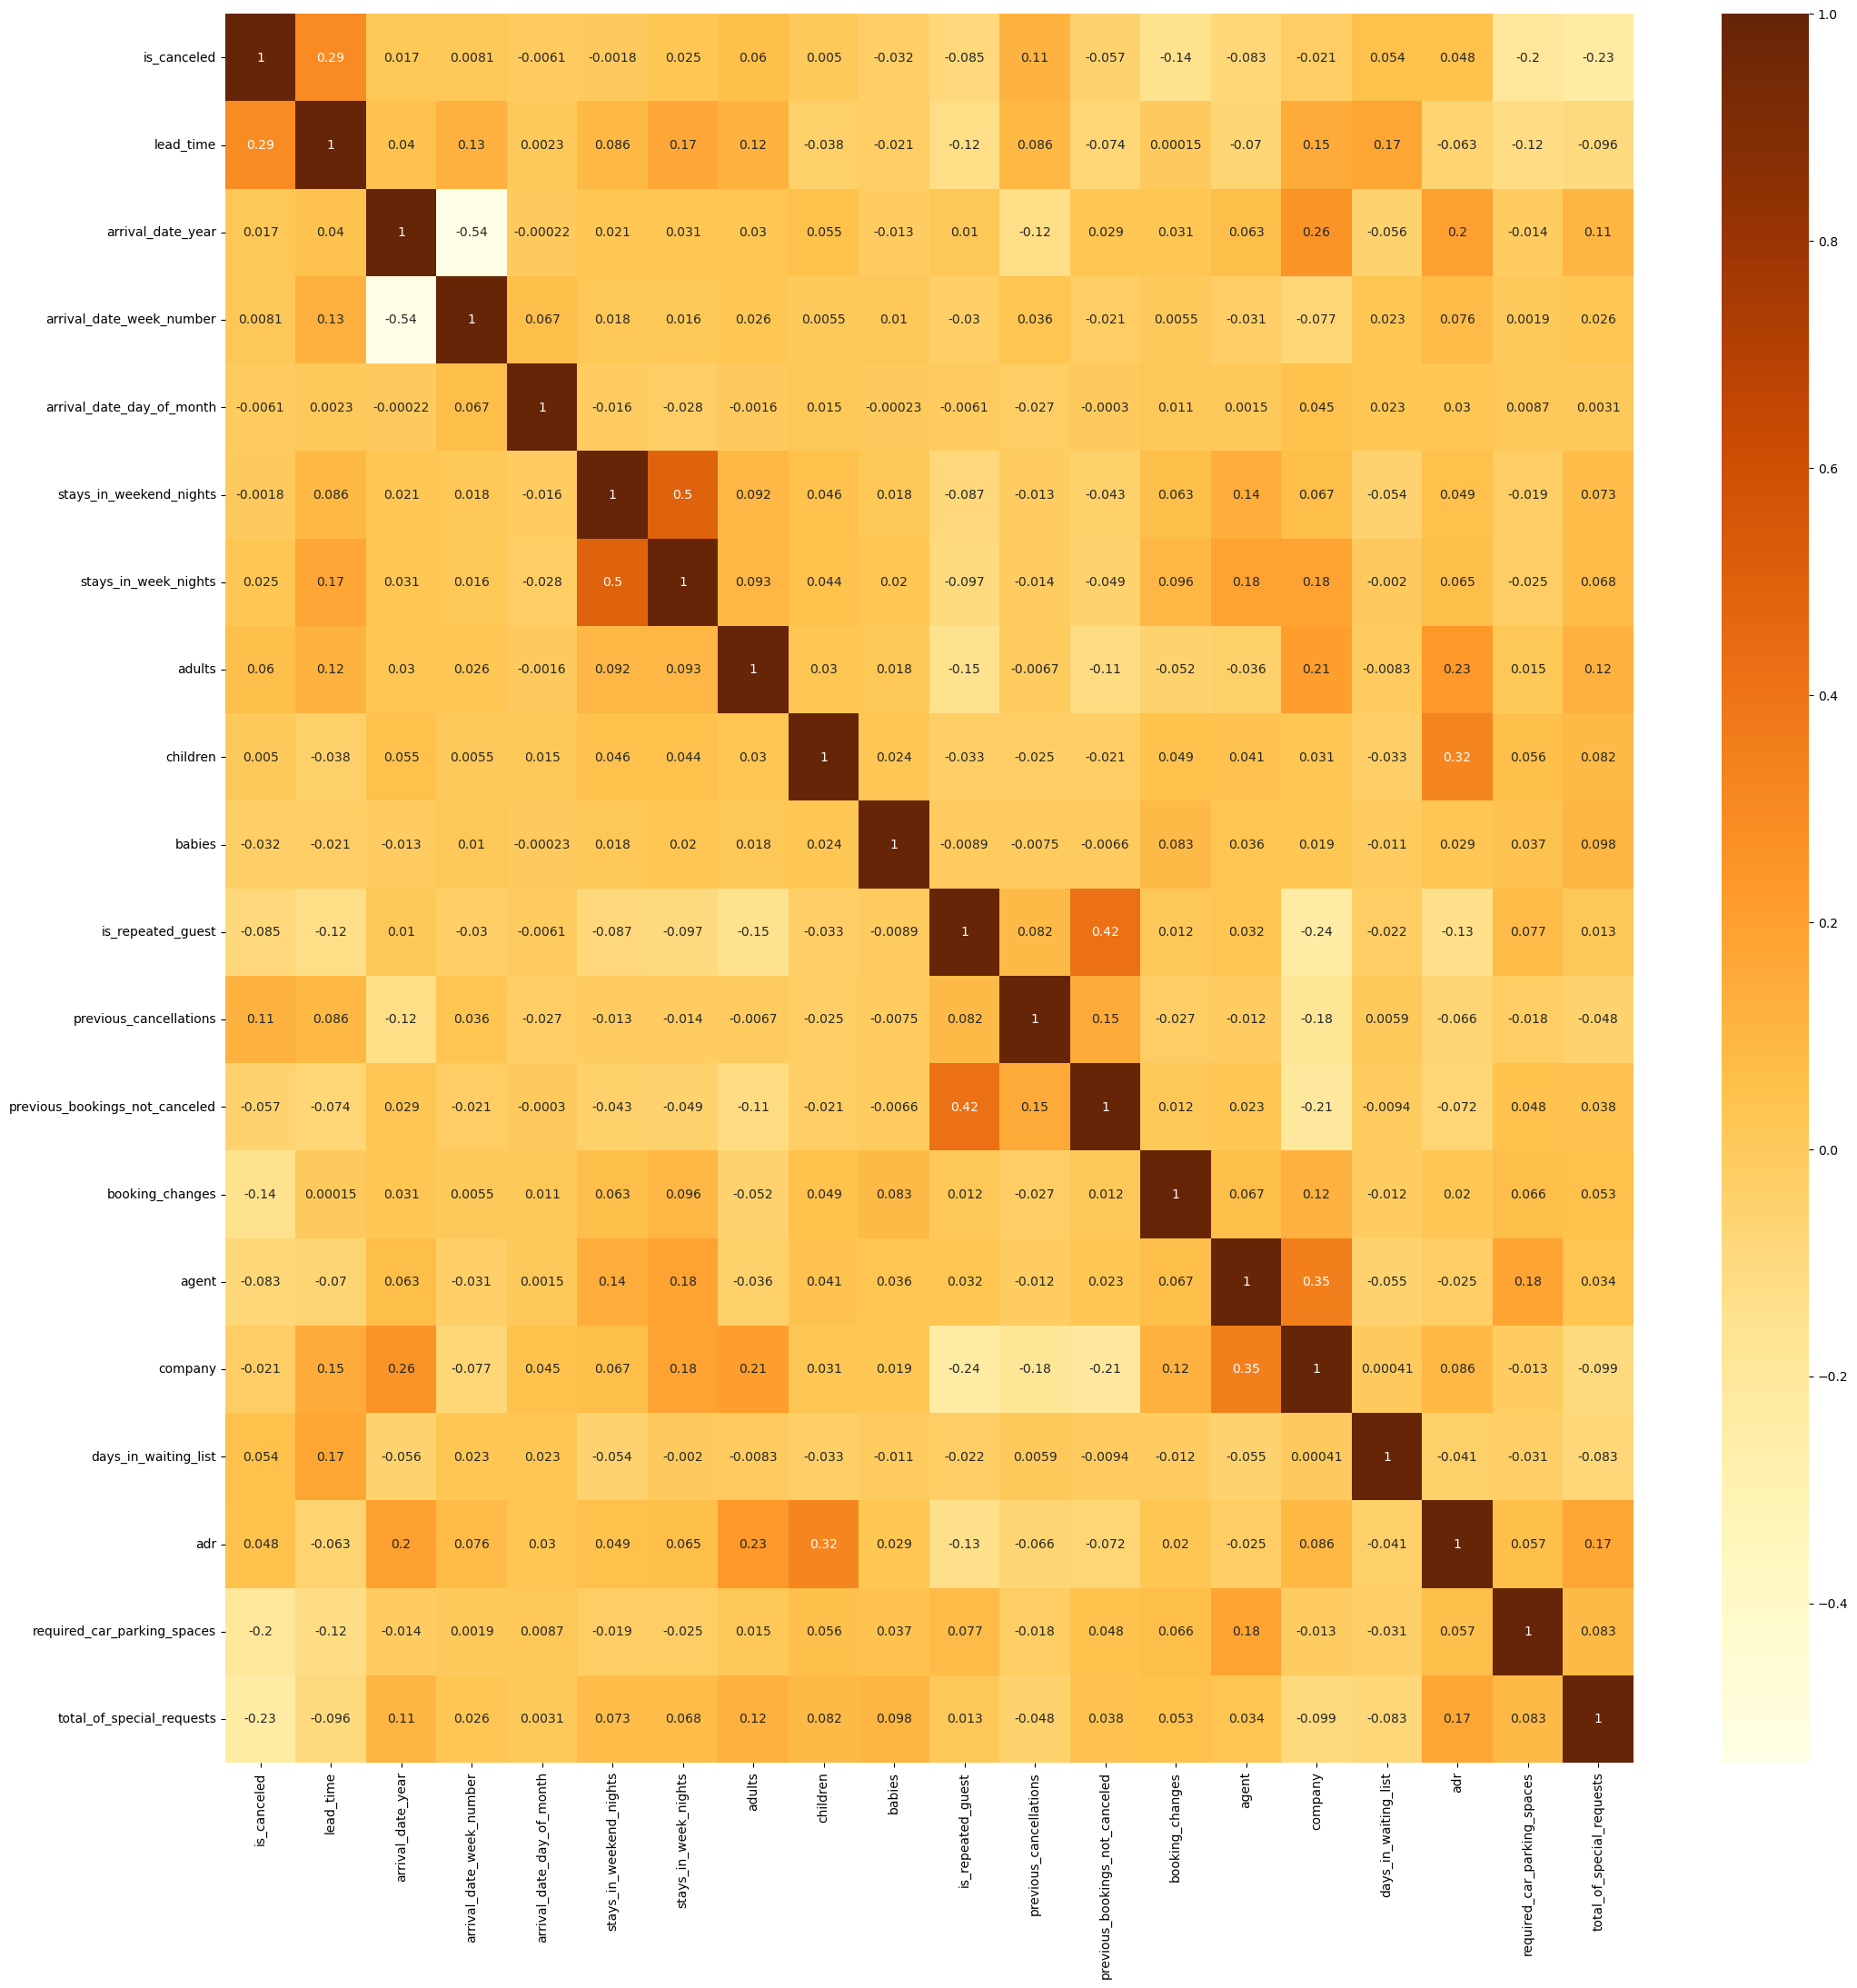

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,cmap='YlOrBr')

In [13]:
corr_isCanceled=df[num_features].corr()['is_canceled']

In [14]:
corr_isCanceled

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [15]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


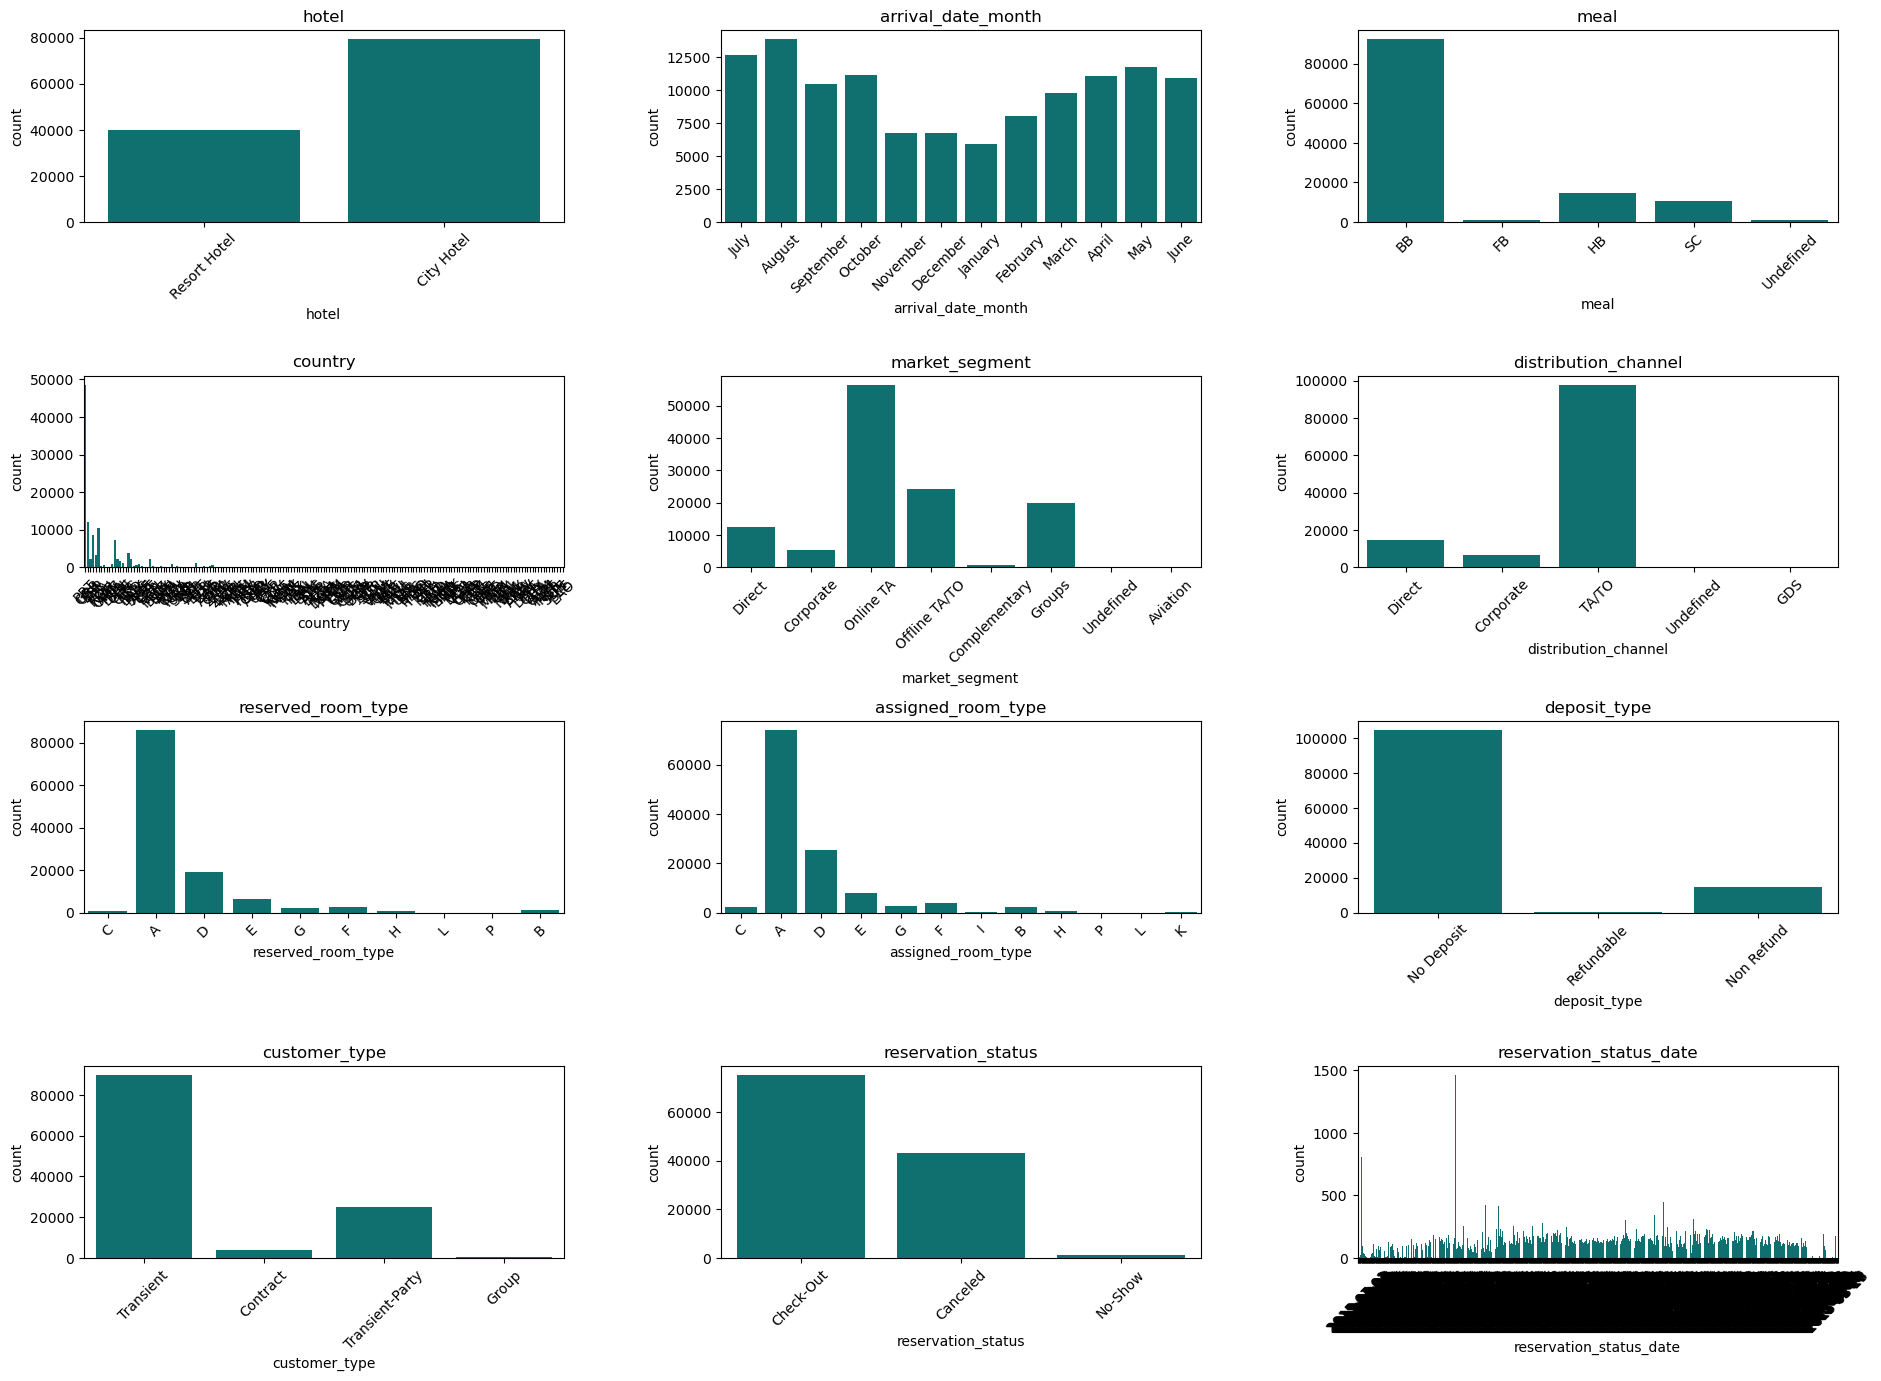

In [16]:
#Categorical features analysis
plt.figure(figsize=(20,15))
for i in range(len(cat_features)):
    
    plt.subplot(4,3,i+1)
    sns.countplot(x=df[cat_features[i]],color='teal')
    plt.title(cat_features[i])
    plt.xticks(rotation=45)

plt.tight_layout(pad=5.0)
plt.subplots_adjust(hspace=0.8)
plt.show()

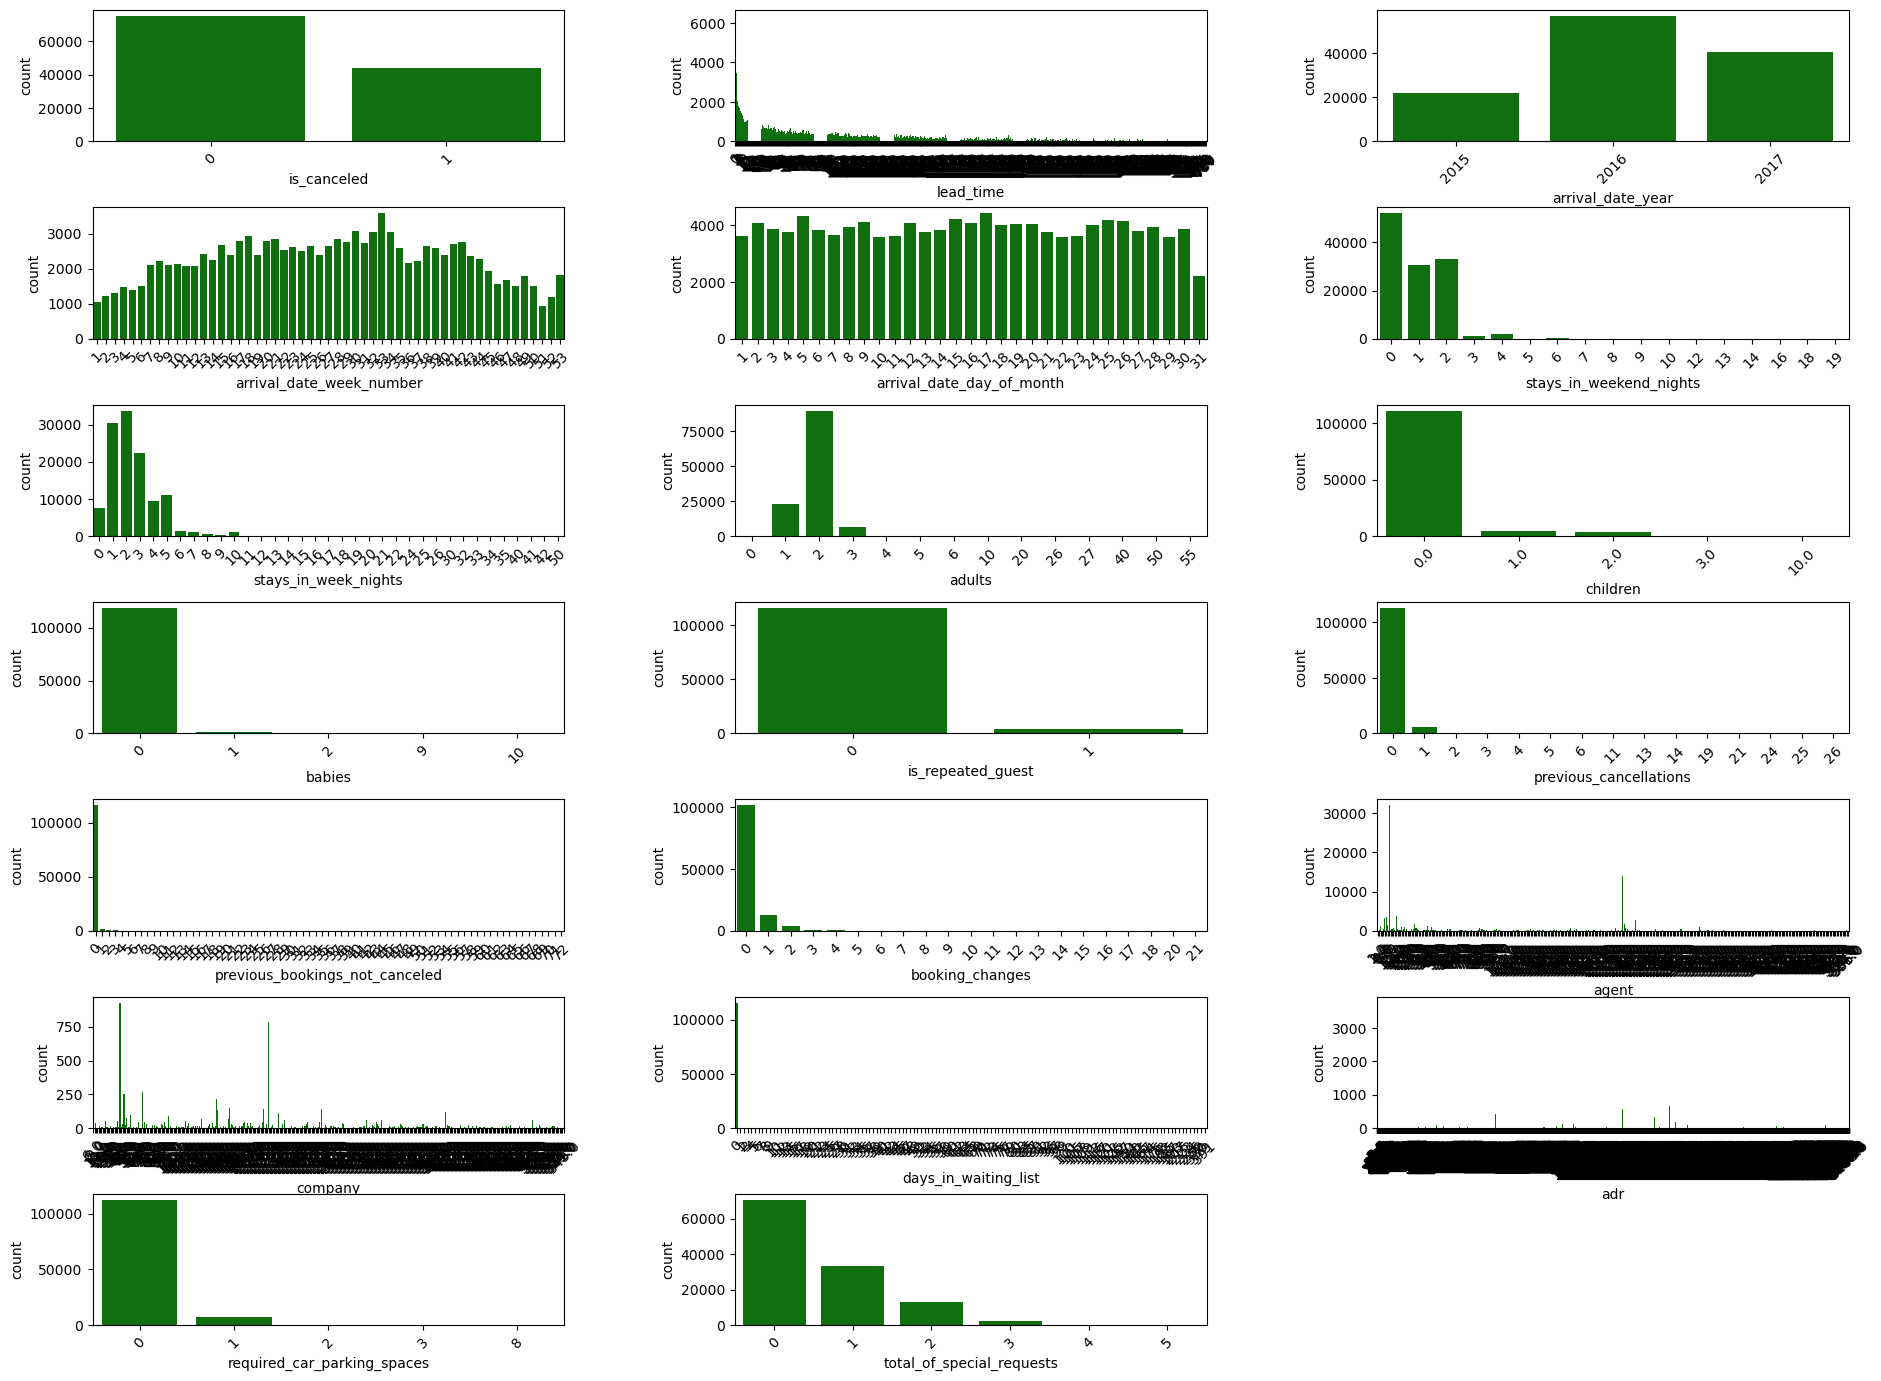

In [17]:
#numerical features analysis
plt.figure(figsize=(20,15))
for i in range(len(num_features)):
    
    plt.subplot(7,3,i+1)
    sns.countplot(x=df[num_features[i]],color='green')
    plt.xticks(rotation=45)

plt.tight_layout(pad=5.0)
plt.subplots_adjust(hspace=0.5)
plt.show()

<Axes: xlabel='lead_time', ylabel='Count'>

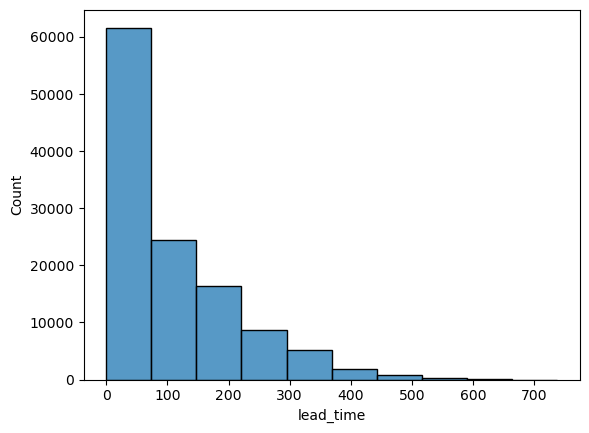

In [18]:
sns.histplot(data=df,x='lead_time',bins=10)

In [19]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [20]:
is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
**Family_size                       0.046506
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658

SyntaxError: invalid syntax (1573610124.py, line 1)

In [21]:
df['Family_size']=df['adults']+df['children']+df['babies']

In [23]:
feature=['Family_size','is_canceled']

In [25]:
df[feature].corr()['is_canceled']

Family_size    0.046506
is_canceled    1.000000
Name: is_canceled, dtype: float64

In [27]:
df[cat_features].head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [29]:
df['hotel']=df['hotel'].map({'City Hotel':1,'Resort Hotel':0})

In [31]:
#CAT FEATURES IMPORTANCE
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

def categorical_feature_importance(df, cat_cols, target_col):
    # Encode categorical features as numbers
    X = df[cat_cols].apply(LabelEncoder().fit_transform)
    y = df[target_col]
    
    # Mutual Information
    mi_scores = mutual_info_classif(X, y, discrete_features=True, random_state=42)
    
    # Create sorted DataFrame
    mi_df = pd.DataFrame({
        'Feature': cat_cols,
        'MI_Score': mi_scores
    }).sort_values(by='MI_Score', ascending=False).reset_index(drop=True)
    
    return mi_df


categorical_cols = [
    'hotel', 'arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type',
    'reservation_status'
]


mi_results = categorical_feature_importance(df, categorical_cols, 'is_canceled')
print(mi_results)


                 Feature  MI_Score
0     reservation_status  0.659177
1           deposit_type  0.130952
2                country  0.067132
3         market_segment  0.036687
4     assigned_room_type  0.021782
5   distribution_channel  0.017106
6          customer_type  0.009796
7                  hotel  0.009541
8     reserved_room_type  0.002776
9     arrival_date_month  0.002489
10                  meal  0.001264


In [53]:
final_features=['lead_time','previous_cancellations','booking_changes','required_car_parking_spaces','total_of_special_requests','adr','deposit_type','market_segment']

In [55]:
new_df=df[final_features+['is_canceled']]

In [57]:
new_df

,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,adr,deposit_type,market_segment,is_canceled
0,342,0,3,0,0,0.00,No Deposit,Direct,0
1,737,0,4,0,0,0.00,No Deposit,Direct,0
2,7,0,0,0,0,75.00,No Deposit,Direct,0
3,13,0,0,0,0,75.00,No Deposit,Corporate,0
4,14,0,0,0,1,98.00,No Deposit,Online TA,0
...,...,...,...,...,...,...,...,...,...
119385,23,0,0,0,0,96.14,No Deposit,Offline TA/TO,0
119386,102,0,0,0,2,225.43,No Deposit,Online TA,0
119387,34,0,0,0,4,157.71,No Deposit,Online TA,0
119388,109,0,0,0,0,104.40,No Deposit,Online TA,0


In [59]:
for i in final_features:
    print(new_df[i].value_counts())

lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64
previous_cancellations
0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: count, dtype: int64
booking_changes
0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: count, dtype: int64
required_car_parking_spaces
0    111974
1      7383
2        28
3         3
8         2
Name: count, dtype: int64
total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: count, dtype: int64
adr
62.00     3754
75.00    

In [61]:
#ohe: reservation status , marketsegmet, deposittype

In [63]:
X = new_df.drop(columns=["is_canceled"])
y = new_df["is_canceled"]


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [75]:
numeric_features = ['lead_time','previous_cancellations','booking_changes',
                    'required_car_parking_spaces','total_of_special_requests','adr']
categorical_features = ['deposit_type','market_segment']


In [77]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [79]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])


In [81]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8280006700728704
Confusion Matrix:
 [[13354  1679]
 [ 2428  6417]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87     15033
           1       0.79      0.73      0.76      8845

    accuracy                           0.83     23878
   macro avg       0.82      0.81      0.81     23878
weighted avg       0.83      0.83      0.83     23878

